# Disaster Tweets and its Consequences

#### Twitter has become an important communication channel in times of emergency. The ubiquitousness of smartphones enables people to announce an emergency they’re observing in real-time. Because of this, more agencies are interested in programmatically monitoring Twitter  (i.e. disaster relief organizations and news agencies).

**Problem To Solve** - Predict which Tweets are about real disasters and which ones are not
<img src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcR7UC1R_V7RUvB2P140YPT5N70EwAOCjb893UauMd_Gp0RQoBM&s" width="500">

# Work Flow
<img src="https://www.mdpi.com/ijgi/ijgi-06-00368/article_deploy/html/images/ijgi-06-00368-g001.png" width="500">

# Version History
* **Version 1 ---------------------------------------------------------------  22-08-2020**
* * Old version
* **Version 2 ---------------------------------------------------------------- 22-08-2020**
* * *Modifying Some Results*
* **Version 3 ---------------------------------------------------------------- 22-08-2020**
* * *Modifying Some Results*
* **Version 4 ---------------------------------------------------------------- 23-08-2020**
* * Loading Libraries
* * Loading Data
* * EDA ON TWEETS
* * Target Counts
* * Calculating and analyzing Char length of each text
* * Calculating and analyzing No. of words in each text
* * Extracting urls from the text
* * Cleaning Text ( by removing urls )
* * Looking for emojis
* * Emojis Text Cloud
* * Cleaning Text ( by replacing emojis to emojis text )
* **Version 5 ---------------------------------------------------------------- 24-08-2020**
* * Getting textfile
* * Hashtags
* * Hashtags Cloud
* * Cleaning Text ( by removing Hashtags )
* **Version 6 ---------------------------------------------------------------- 25-08-2020**
* * Dealing with @username 
* * Cleaning Text ( by removing @)
* **Version 7 ---------------------------------------------------------------- 26-08-2020**
* * Getting Phone Numbers
* * Cleaning Text ( by removing Phone Number )
* * Punctuations
* * Cleaning Text ( by removing Punctuations and special symbols)
* **Version 8 ----------------------------------------------------------------- 27-08-2020**
* * *Modifying Some Results*
* **Version 9 ----------------------------------------------------------------- 27-08-2020**
* * Misspelt word(typo)
* **Version 10 ---------------------------------------------------------------- 27-08-2020**
* * *Modifying Some Results*
* **Version 11 ---------------------------------------------------------------- 27-08-2020**
* * *Modifying Some Results*
* **Version 12 ---------------------------------------------------------------- 28-08-2020**
* * Splitting dataset
* * BagOfWords Implementation
* * Baseline Model (Naive Bayes)
* * Linear Model (SGD Classifier)
* **Version 13 ---------------------------------------------------------------- 30-08-2020**
* * *Modifying Some Results*
* **Version 14 ---------------------------------------------------------------- 30-08-2020**
* * Preprocessing Test Set
* * Linear Model Prediction on test set
* **Version 15 --------------------------------------------------------------- *In Progress***
* * Acknowledement to other source

# Loading Libraries

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import re
import emoji

from IPython.display import Markdown as md
plt.style.use('ggplot')

In [2]:
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix

# Loading Data

In [3]:
train_path = "../input/nlp-getting-started/train.csv"
test_path = "../input/nlp-getting-started/test.csv"
sample_submission_path = "../input/nlp-getting-started/sample_submission.csv"

In [4]:
df_train = pd.read_csv(train_path)
df_test = pd.read_csv(test_path)
submission = pd.read_csv(sample_submission_path)

# EDA ON TWEETS
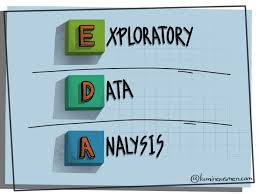

In [5]:
df_train.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [6]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


In [7]:
print(df_train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB
None


In [8]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3263 entries, 0 to 3262
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        3263 non-null   int64 
 1   keyword   3237 non-null   object
 2   location  2158 non-null   object
 3   text      3263 non-null   object
dtypes: int64(1), object(3)
memory usage: 102.1+ KB


### Looking for text and target data only

In [9]:
df_train = df_train[['text','target']]
df_test = df_test[['text']]

# Target Counts

Difference between target 0 and 1:  1071


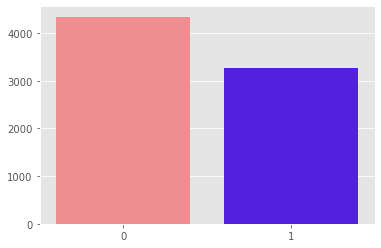

In [10]:
y = np.array(df_train.target.value_counts())
sns.barplot(x = [0,1],y = y,palette='gnuplot2_r')
difference = y[0]-y[1]
print("Difference between target 0 and 1: ",y[0]-y[1])

In [11]:
df_train.text.describe()

count                                                  7613
unique                                                 7503
top       11-Year-Old Boy Charged With Manslaughter of T...
freq                                                     10
Name: text, dtype: object

<h3 style="color:red;" > ☠️ Histogram is plot on continuous variable but we will see analyse variable discreate variable. Before analysing this we suppose that these variables are continuous rather than discreate. Because of higher bins(buckets) some of histogram more likely seems as barplot. </h3>

# Calculating and analyzing Char length of each text

In [12]:
df_train['Char_length'] = df_train['text'].apply(len)

In [13]:
df_train[df_train['target']==0].Char_length.head()

15    14
16    13
17    16
18    17
19    28
Name: Char_length, dtype: int64

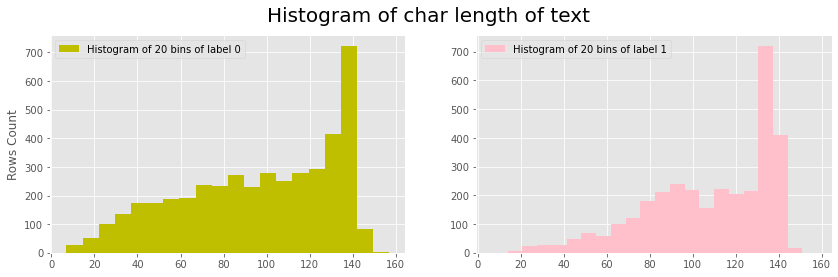

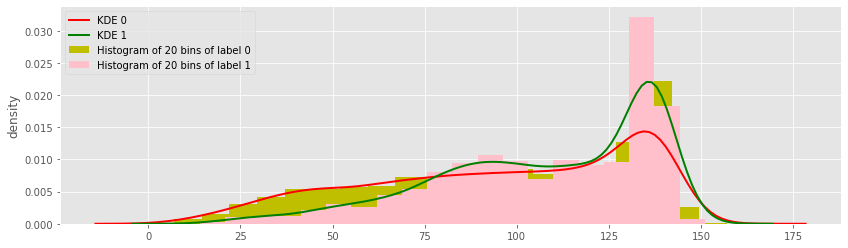

In [14]:
f, axes = plt.subplots(1, 2, figsize=(14, 4), sharex=True)
f.suptitle("Histogram of char length of text",fontsize=20)
sns.distplot(df_train[df_train['target']==0].Char_length.values,kde=False,bins=20,hist=True,ax=axes[0],label="Histogram of 20 bins of label 0",
            kde_kws={"color": "r", "lw": 2, "label": "KDE 0"},
                           hist_kws={ "linewidth": 2,
                                     "alpha": 1, "color": "y"})
axes[0].legend(loc="best")
axes[0].set_ylabel("Rows Count")
sns.distplot(df_train[df_train['target']==1].Char_length.values,kde=False,bins=20,hist=True,ax=axes[1],label="Histogram of 20 bins of label 1",
            kde_kws={"color": "g", "lw": 2, "label": "KDE 1"},
                           hist_kws={ "linewidth": 2,
                                     "alpha": 1, "color": "pink"})
axes[1].legend(loc="best")

plt.figure(figsize=(14,4))
sns.distplot(df_train[df_train['target']==0].Char_length.values,kde=True,bins=20,hist=True,label="Histogram of 20 bins of label 0",
            kde_kws={"color": "r", "lw": 2,"label": "KDE 0"},
                           hist_kws={ "linewidth": 2,
                                     "alpha": 1, "color": "y"})

sns.distplot(df_train[df_train['target']==1].Char_length.values,kde=True,bins=20,hist=True,label="Histogram of 20 bins of label 1",
            kde_kws={"color": "g", "lw": 2,"label": "KDE 1"},
                           hist_kws={ "linewidth": 2,
                                     "alpha": 1, "color": "pink"})
plt.ylabel("density")
plt.legend(loc="best")

### Text length almost same for both targets

# Calculating and analyzing No. of words in each text

In [15]:
def word_count(sent):
    return len(sent.split())
df_train['word_count'] = df_train.text.apply(word_count)

In [16]:
df_train.head()

,text,target,Char_length,word_count
0,Our Deeds are the Reason of this #earthquake M...,1,69,13
1,Forest fire near La Ronge Sask. Canada,1,38,7
2,All residents asked to 'shelter in place' are ...,1,133,22
3,"13,000 people receive #wildfires evacuation or...",1,65,8
4,Just got sent this photo from Ruby #Alaska as ...,1,88,16


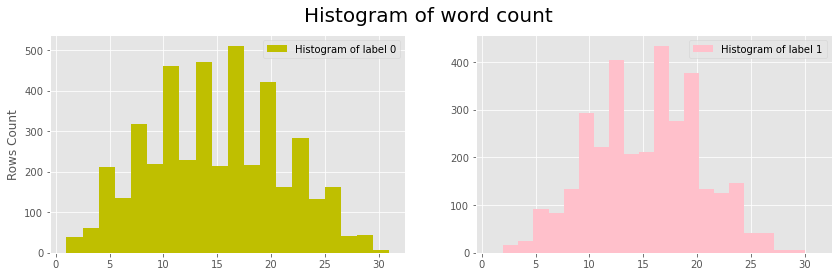

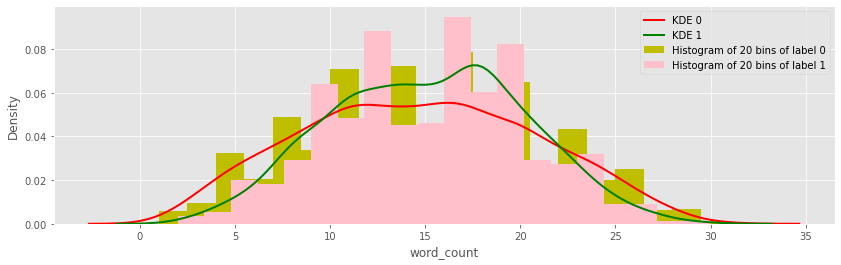

In [17]:
f, axes = plt.subplots(1, 2, figsize=(14, 4), sharex=True)
f.suptitle("Histogram of word count",fontsize=20)
sns.distplot(df_train[df_train['target']==0].word_count.values,kde=False,bins=20,hist=True,ax=axes[0],label="Histogram of label 0",
            kde_kws={"color": "r", "lw": 2, "label": "KDE 0"},
                           hist_kws={ "linewidth": 2,
                                     "alpha": 1, "color": "y"})
axes[0].legend(loc="best")
axes[0].set_ylabel("Rows Count")
sns.distplot(df_train[df_train['target']==1].word_count.values,kde=False,bins=20,hist=True,ax=axes[1],label="Histogram of label 1",
            kde_kws={"color": "g", "lw": 2, "label": "KDE 1"},
                           hist_kws={ "linewidth": 2,
                                     "alpha": 1, "color": "pink"})
axes[1].legend(loc="best")

plt.figure(figsize=(14,4))
sns.distplot(df_train[df_train['target']==0].word_count,kde=True,bins=20,hist=True,label="Histogram of 20 bins of label 0",
            kde_kws={"color": "r", "lw": 2,"label": "KDE 0"},
                           hist_kws={ "linewidth": 2,
                                     "alpha": 1, "color": "y"})

sns.distplot(df_train[df_train['target']==1].word_count,kde=True,bins=20,hist=True,label="Histogram of 20 bins of label 1",
            kde_kws={"color": "g", "lw": 2,"label": "KDE 1"},
                           hist_kws={ "linewidth": 2,
                                     "alpha": 1, "color": "pink"})
plt.ylabel("Density")
plt.legend(loc="best")

### Looks almost same for both targets

# Extracting urls from the text

In [18]:
def urls(sent):
    return re.findall('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+',sent)
def url_counts(sent):
    return len(re.findall('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+',sent))
def remove_urls(sent):
    return re.sub('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+','',sent)

In [19]:
s ='Working on Nlp. So much fun  - https://www.helloworld.com, https://www.worldhello.com'
print(urls(s))
print(url_counts(s))
print(remove_urls(remove_urls(s)))

['https://www.helloworld.com,', 'https://www.worldhello.com']
2
Working on Nlp. So much fun  -  


In [20]:
%%time

df_train['url_count'] = df_train.text.apply(url_counts)
df_train['urls'] = df_train.text.apply(urls)

CPU times: user 64.8 ms, sys: 879 µs, total: 65.7 ms
Wall time: 65.2 ms


In [21]:
# An overview of dataframe after above transformations
df_train.head()

,text,target,Char_length,word_count,url_count,urls
0,Our Deeds are the Reason of this #earthquake M...,1,69,13,0,[]
1,Forest fire near La Ronge Sask. Canada,1,38,7,0,[]
2,All residents asked to 'shelter in place' are ...,1,133,22,0,[]
3,"13,000 people receive #wildfires evacuation or...",1,65,8,0,[]
4,Just got sent this photo from Ruby #Alaska as ...,1,88,16,0,[]


In [22]:
print("Total Urls : ",sum(df_train.url_count))

Total Urls :  4721


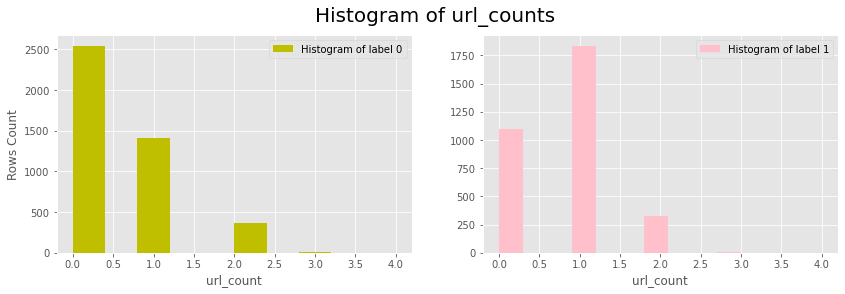

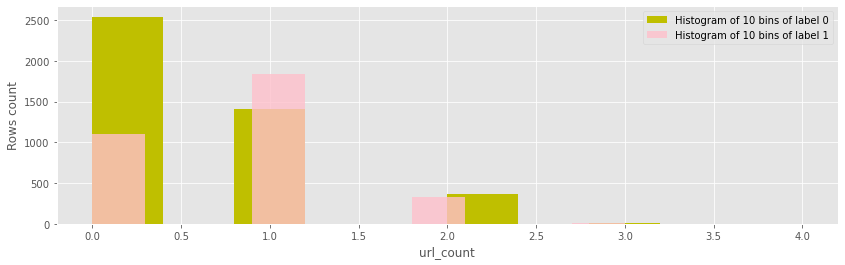

In [23]:
f, axes = plt.subplots(1, 2, figsize=(14, 4), sharex=True)
f.suptitle("Histogram of url_counts",fontsize=20)
sns.distplot(df_train[df_train['target']==0].url_count,kde=False,bins=10,hist=True,ax=axes[0],label="Histogram of label 0",
                           hist_kws={ "linewidth": 2,
                                     "alpha": 1, "color": "y"})
axes[0].legend(loc="best")
axes[0].set_ylabel("Rows Count")
sns.distplot(df_train[df_train['target']==1].url_count,kde=False,bins=10,hist=True,ax=axes[1],label="Histogram of label 1",
                           hist_kws={ "linewidth": 2,
                                     "alpha": 1, "color": "pink"})
axes[1].legend(loc="best")

plt.figure(figsize=(14,4))
sns.distplot(df_train[df_train['target']==0].url_count,kde=False,bins=10,hist=True,label="Histogram of 10 bins of label 0",
                           hist_kws={ "linewidth": 2,
                                     "alpha": 1, "color": "y"})

sns.distplot(df_train[df_train['target']==1].url_count,kde=False,bins=10,hist=True,label="Histogram of 10 bins of label 1",
                           hist_kws={ "linewidth": 2,
                                     "alpha": 0.8, "color": "pink"})
plt.ylabel("Rows count")
plt.legend(loc="best")

### Looks more url counts in disaster Tweets

In [24]:
# Actual Url Count  and differnece
print("Actual Url Count in 0 : ",df_train[df_train['target']==0].url_count.sum())
print("Actual Url Count in 1 : ",df_train[df_train['target']==1].url_count.sum())
print("Actual Url Count  differnece : "
      ,df_train[df_train['target']==1].url_count.sum() - df_train[df_train['target']==0].url_count.sum())

Actual Url Count in 0 :  2203
Actual Url Count in 1 :  2518
Actual Url Count  differnece :  315


In [25]:
# Unique Urls

total_uniques = np.unique(np.ravel(df_train.urls.values)).shape[0]
uniques_in_1 = np.unique(np.ravel(df_train[df_train['target']==1].urls.values)).shape[0]
uniques_in_0 = np.unique(np.ravel(df_train[df_train['target']==0].urls.values)).shape[0]
print("Total uniques url : ", total_uniques)
print("Uniques in 0 : ",uniques_in_0)
print("Uniques in 1 : ",uniques_in_1)

Total uniques url :  3889
Uniques in 0 :  1765
Uniques in 1 :  2136


# Cleaning text 
 - by removing urls link from text as we have extract urls to other column feature.

In [26]:
df_train['text'] = df_train.text.apply(remove_urls)

# Looking for emojis
* Emojis are very few in the content text.
* So We are not only looking for emojis but some special content as :{special content}:
* We simply call emojis to both emojis and special content.

In [27]:
# Only for emojis not work for special content
def emoji_extraction(s):
    return ''.join(c for c in s if c in emoji.UNICODE_EMOJI)
def emoji_count(s):
    return len(''.join(c for c in s if c in emoji.UNICODE_EMOJI))

In [28]:
# Example

s = "Working on Nlp 🙂. So much 😀 fun 😀 "
print("emoji_text                      : ", emoji_extraction(s))
print("Count of emojis                 : ",emoji_count(s))

emoji_text                      :  🙂😀😀
Count of emojis                 :  3


In [29]:
# Work for both emojis and special content.

def emoji_extraction(sent):
    e_sent = emoji.demojize(sent)
    
    return re.findall(':(.*?):',e_sent)
def emoji_count(sent):
    e_sent = emoji.demojize(sent)
    return len(re.findall(':(.*?):',e_sent))

def emoji_to_text(sent):
    e_sent = emoji.demojize(sent)
    emo = re.findall(':(.*?):',e_sent)
    for e in emo:
        e_sent = e_sent.replace(':{}:'.format(e),'{}'.format(e))
    return e_sent

In [30]:
# Example

s = "Working on Nlp 🙂. So much 😀 fun 😀 "
print("emoji_text                      : ", emoji_extraction(s))
print("Count of emojis                 : ",emoji_count(s))

print("Placing text in place of emojis : ",emoji_to_text(s))

emoji_text                      :  ['slightly_smiling_face', 'grinning_face', 'grinning_face']
Count of emojis                 :  3
Placing text in place of emojis :  Working on Nlp slightly_smiling_face. So much grinning_face fun grinning_face 


In [31]:
%%time
df_train['emoji_count'] = df_train.text.apply(emoji_count)
df_train['emojis'] = df_train.text.apply(emoji_extraction)

CPU times: user 7.4 s, sys: 529 µs, total: 7.4 s
Wall time: 7.4 s


In [32]:
df_train[85:90]

,text,target,Char_length,word_count,url_count,urls,emoji_count,emojis
85,Carolina accident: Motorcyclist Dies in I-540 ...,1,136,17,1,[http://t.co/p18lzRlmy6],1,[ Motorcyclist Dies in I-540 Crash With Car Th...
86,FYI CAD:FYI: ;ACCIDENT PROPERTY DAMAGE;NHS;999...,1,67,8,0,[],1,[FYI]
87,RT nAAYf: First accident in years. Turning ont...,1,142,24,0,[],0,[]
88,Accident left lane blocked in #Manchester on R...,1,128,25,0,[],0,[]
89,;ACCIDENT PROPERTY DAMAGE; PINER RD/HORNDALE DR,1,47,6,0,[],0,[]


In [33]:
emoji_count0  = df_train[df_train.target==0].emoji_count.value_counts()
emoji_count0 = emoji_count0.sort_index()

emoji_count1  = df_train[df_train.target==1].emoji_count.value_counts()
emoji_count1 = emoji_count1.sort_index()

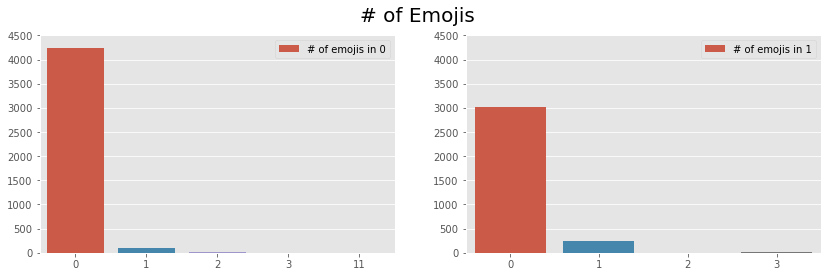

In [34]:
f,axes = plt.subplots(1,2,figsize=(14, 4))
f.suptitle("# of Emojis",fontsize=20)
sns.barplot(emoji_count0.index,emoji_count0.values,ax = axes[0], label = "# of emojis in 0")
axes[0].set(ylim=(0, 4500))
plt.legend()
axes[0].legend(loc="best")

sns.barplot(emoji_count1.index,emoji_count1.values,ax = axes[1], label = "# of emojis in 1")
axes[1].set(ylim=(0, 4500))
axes[1].legend(loc="best")

In [35]:
print("Actual emoji Count in 0 : ",df_train[df_train['target']==0].emoji_count.sum())
print("Actual emoji Count in 1 : ",df_train[df_train['target']==1].emoji_count.sum())
print("Actual Url Count  differnece : "
      ,df_train[df_train['target']==1].emoji_count.sum() - df_train[df_train['target']==0].emoji_count.sum())

Actual emoji Count in 0 :  127
Actual emoji Count in 1 :  275
Actual Url Count  differnece :  148


# Emojis Text Cloud

In [36]:
# Converting list of Emojis_text to Single full_text

def concatlists(lists):
    full_text =""
    for l in lists:
        full_text = full_text + " "+l[0]
    return full_text    


lists0 = df_train[np.logical_and(df_train.emoji_count>0,df_train.target==0)].emojis.values

emoji_text_for_target0 = concatlists(lists0)


lists1 = df_train[np.logical_and(df_train.emoji_count>0,df_train.target==1)].emojis.values

emoji_text_for_target1 = concatlists(lists1)

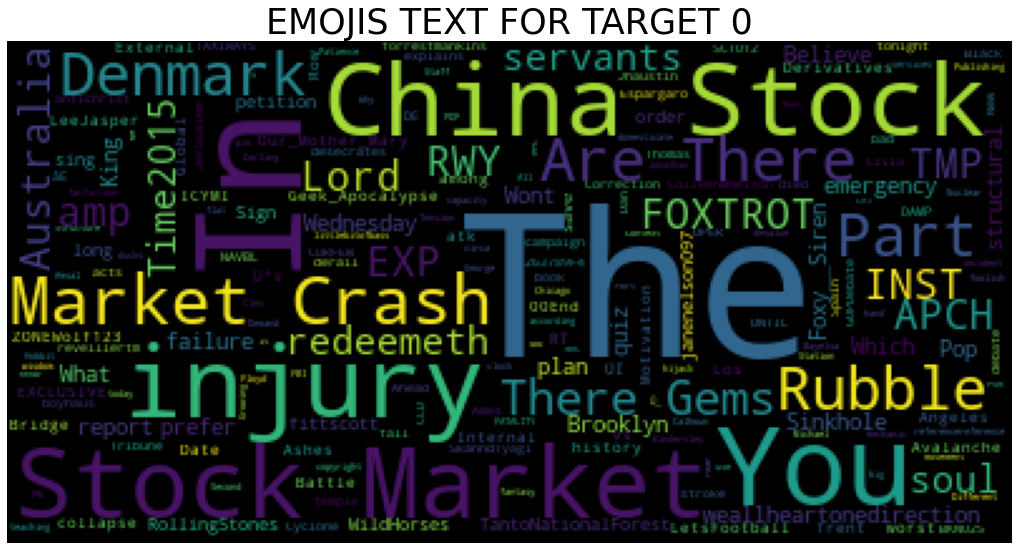

In [37]:
plt.figure(figsize = (18,12))
cloud = WordCloud(background_color='black',max_font_size =80).generate(emoji_text_for_target0)
plt.imshow(cloud)
plt.axis('off')
plt.title("EMOJIS TEXT FOR TARGET 0",fontsize=35)
plt.show()

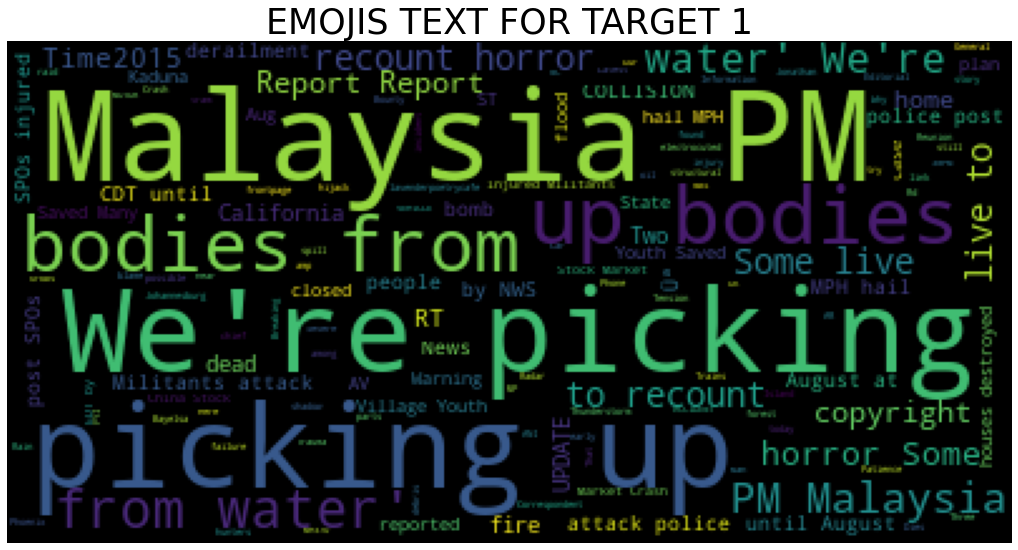

In [38]:
plt.figure(figsize = (18,12))
cloud = WordCloud(background_color='black',max_font_size =50).generate(emoji_text_for_target1)
plt.imshow(cloud)
plt.axis('off')
plt.title("EMOJIS TEXT FOR TARGET 1",fontsize=35)
plt.show()

# Cleaning text 
- by replacing emoji to emoji_text

In [39]:
%%time
df_train['text'] = df_train['text'].apply(emoji_to_text)

CPU times: user 3.68 s, sys: 1.99 ms, total: 3.69 s
Wall time: 3.69 s


#### To Get more familier with text. We collect the text to a textfile and then point out some more features in it.

# Getting textfile

In [40]:
def get_text(df):
    astext = '. '.join(list(df_train.text.values))
    text_file = open("tweets.txt", "w")
    text_file.write(astext)
    text_file.close()
    
get_text(df_train)

#### by birdview of textfile. Some of the insights are-
* textfile contains Hashtags
* textfile contains @
* contains date and numbers
* punctuation specially ( ? , ' . - " : )
* Special Character $ * %
* Misspelt word(typos) and abbreviations

## Some common symbol and uses

* '&'   
        -> The ampersand is short-hand for the word "and". It is typically seen in company names and various abbreviations.
* '*' 
        -> We use the asterisk to point to an annotation or footnote.
        -> It can also be used as a substitute for letters in a swear word ("Oh f***!") or to make a name anonymous (Mr M***).
* '@' 
        -> Originally an accounting shorthand meaning "at the rate of".
        -> Today the at sign is most commonly seen in email addresses and social media handles.
       
* '#' 
        -> Since 2007 it has been used to create social media hashtags.
        -> The symbol # is commonly used with numbers, especially in American English.
        -> It is also used on standard phone keyboards.

#### Visit [site](https://www.englishclub.com/writing/symbols.php#:~:text=%40,addresses%20and%20social%20media%20handles.) to get familier with typing symbols.

# Hashtags

In [41]:
def find_hashtags(text):
    gethashtags = re.findall('#\w*[a-zA-Z]\w*',text)
    return gethashtags

def count_hashtags(text):
    gethashtags = re.findall('#\w*[a-zA-Z]\w*',text)
    return len(gethashtags)

def remove_hashtags(text):
    return re.sub('#\w*[a-zA-Z]\w*','',text)

**#\w*[a-zA-Z]\w* &nbsp; &nbsp; -> &nbsp; &nbsp; # after that string(any letter or number) with at least one letter**
* \w: Any letter or number, *: 0 or more times
* [a-zA-Z]: Any letter, A-Z, caps A-Z or lowercase a-z
* \w: Any letter or number, *: 0 or more times

In [42]:
# Example

s = "Working on Nlp #Nlp. So much fun #getfun awesome #tag89tag  #99999" 
print("Hashtags    : ",find_hashtags(s))
print("HashCount   : ",count_hashtags(s))
print("withouthash : ",remove_hashtags(s))

Hashtags    :  ['#Nlp', '#getfun', '#tag89tag']
HashCount   :  3
withouthash :  Working on Nlp . So much fun  awesome   #99999


#### It will only find or replace hastag with empty string s with at least one letter. It will not touch any standard phone keyboards as describe above in some common symbol and uses.

In [43]:
%%time
df_train['hash_count'] = df_train.text.apply(count_hashtags)
df_train['hashtags'] = df_train.text.apply(find_hashtags)

CPU times: user 40.6 ms, sys: 12 µs, total: 40.6 ms
Wall time: 39.9 ms


In [44]:
df_train.head()

,text,target,Char_length,word_count,url_count,urls,emoji_count,emojis,hash_count,hashtags
0,Our Deeds are the Reason of this #earthquake M...,1,69,13,0,[],0,[],1,[#earthquake]
1,Forest fire near La Ronge Sask. Canada,1,38,7,0,[],0,[],0,[]
2,All residents asked to 'shelter in place' are ...,1,133,22,0,[],0,[],0,[]
3,"13,000 people receive #wildfires evacuation or...",1,65,8,0,[],0,[],1,[#wildfires]
4,Just got sent this photo from Ruby #Alaska as ...,1,88,16,0,[],0,[],2,"[#Alaska, #wildfires]"


In [45]:
hash_count0  = df_train[df_train.target==0].hash_count.value_counts()
hash_count0 = hash_count0.sort_index()

hash_count1  = df_train[df_train.target==1].hash_count.value_counts()
hash_count1 = hash_count1.sort_index()

In [46]:
# Dropping Count 0 as it will unbalance our plot

hash_count0 = hash_count0.drop(0)
hash_count1 = hash_count1.drop(0)

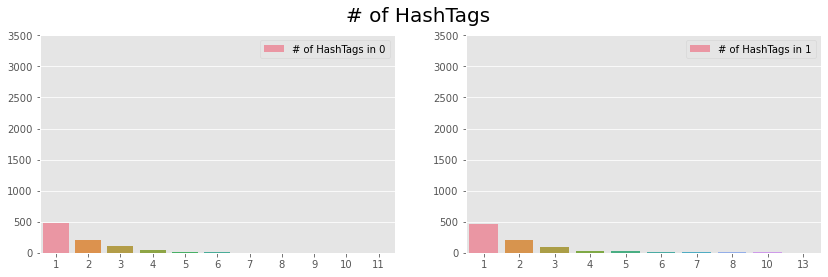

In [47]:
f,axes = plt.subplots(1,2,figsize=(14, 4))
f.suptitle("# of HashTags",fontsize=20)
sns.barplot(hash_count0.index,hash_count0.values,ax = axes[0], label = "# of HashTags in 0")
axes[0].set(ylim=(0, 3500))
plt.legend()
axes[0].legend(loc="best")

sns.barplot(hash_count1.index,hash_count1.values,ax = axes[1], label = "# of HashTags in 1")
axes[1].set(ylim=(0, 3500))
axes[1].legend(loc="best")

# Hashtags Cloud

In [48]:
# Converting list of Hashtags to Single full_text

lists0 = df_train[np.logical_and(df_train.hash_count>0,df_train.target==0)].hashtags.values

hash_for_target0 = concatlists(lists0)


lists1 = df_train[np.logical_and(df_train.hash_count>0,df_train.target==1)].hashtags.values

hash_for_target1 = concatlists(lists1)

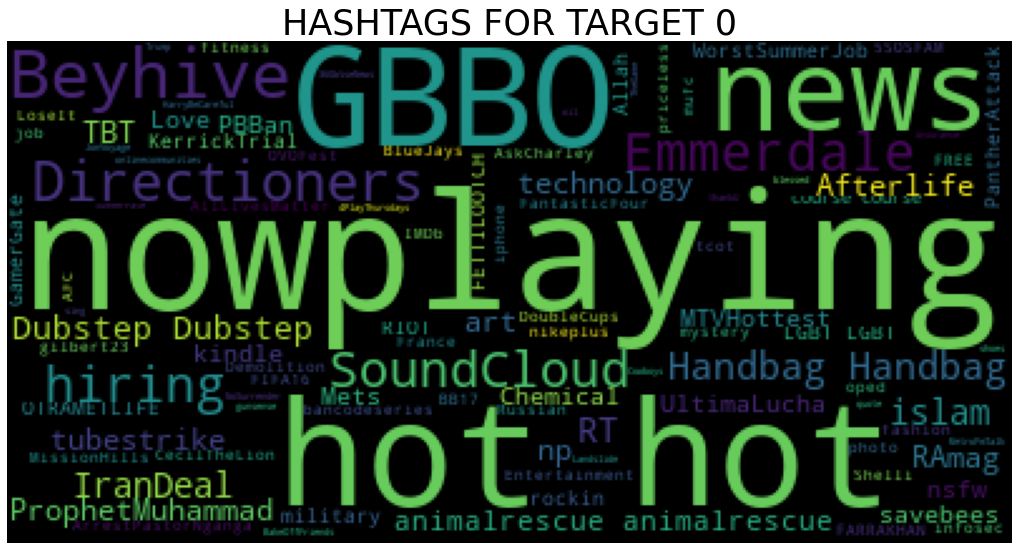

In [49]:
plt.figure(figsize = (18,12))
cloud = WordCloud(background_color='black',max_font_size =80).generate(hash_for_target0)
plt.imshow(cloud)
plt.axis('off')
plt.title("HASHTAGS FOR TARGET 0",fontsize=35)
plt.show()

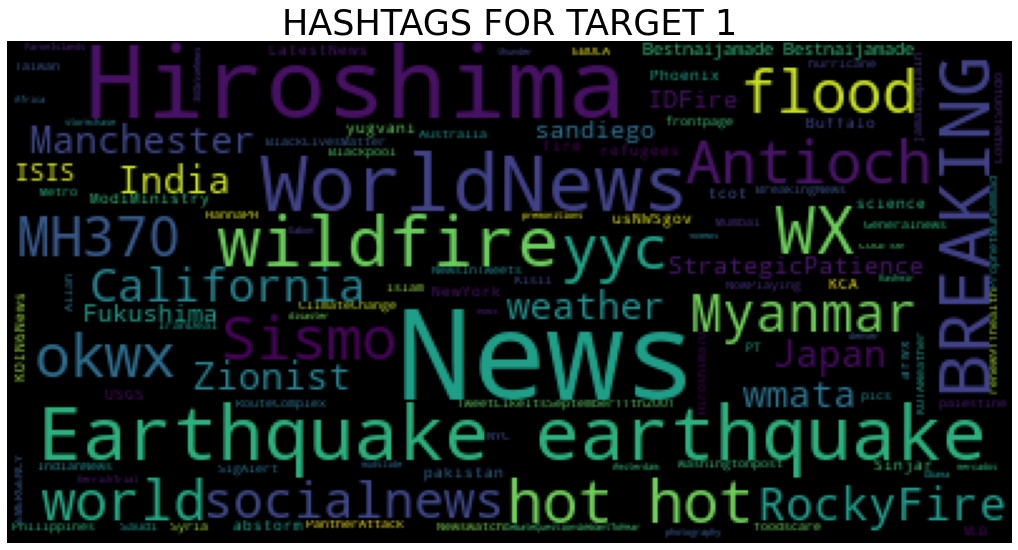

In [50]:
plt.figure(figsize = (18,12))
cloud = WordCloud(background_color='black',max_font_size =50).generate(hash_for_target1)
plt.imshow(cloud)
plt.axis('off')
plt.title("HASHTAGS FOR TARGET 1",fontsize=35)
plt.show()

# Cleaning Text

- by removing hashtags from text

In [51]:
df_train['text'] = df_train.text.apply(remove_hashtags)

# Dealing with @username

In [52]:
def extract_username(sent):
    usernames = re.findall('@[A-Za-z0-9_$]*',sent)
    return usernames

def count_username(sent):
    return len(re.findall('@[A-Za-z0-9_$]*',sent))

def replace_username(sent):
    usernames = extract_username(sent)
    for un in usernames:
        un = re.sub('@','',un)
        sent = sent.replace('@{}'.format(un),'{}'.format(un))
    return sent

In [53]:
# Example

s = "hello this is @Aman. Wanna talk to @some_one99 urgently."

print("usernames       : ", extract_username(s))
print("Count username  : ", count_username(s))
print("replace text    : ", replace_username(s))

usernames       :  ['@Aman', '@some_one99']
Count username  :  2
replace text    :  hello this is Aman. Wanna talk to some_one99 urgently.


# Cleaning Text
- by removing @

#### We will not going to get username as it might be unique for every text so best to remove or replace it. Removing may issue and looks as  misleading text. So we replace it by removing @ symbol. Later we will replace with one common name.

In [54]:
%%time
df_train['text'] = df_train.text.apply(replace_username)

CPU times: user 29.5 ms, sys: 1.99 ms, total: 31.5 ms
Wall time: 30.6 ms


# Getting Phone Numbers

In [55]:
def find_number(text):
    getnumber = re.findall('#[0-9]+',text)
    return getnumber

def count_number(text):
    getnumber = re.findall('#[0-9]+',text)
    return len(getnumber)

def remove_number(text):
    return re.sub('#[0-9]+','',text)

In [56]:
# Example

s = "Working on Nlp #Nlp. So much fun #getfun awesome #tag89tag  #99999" 
print("Number        : ",find_number(s))
print("Numbercount   : ",count_number(s))
print("withoutNumber : ",remove_number(s))

Number        :  ['#99999']
Numbercount   :  1
withoutNumber :  Working on Nlp #Nlp. So much fun #getfun awesome #tag89tag  


In [57]:
%%time
df_train['count_number'] = df_train.text.apply(count_number)
df_train['number'] = df_train.text.apply(find_number)

CPU times: user 36.2 ms, sys: 35 µs, total: 36.2 ms
Wall time: 35.5 ms


In [58]:
print("Total number found : ",df_train.count_number.sum())

Total number found :  43


# Cleaning Text
by removing numbers

In [59]:
df_train['text'] = df_train.text.apply(remove_number)

# Punctuations

In [60]:
def find_punctuations(text):
    getpunctuation = re.findall('[.?"\'`\,\-\!:;\(\)\[\]\\/“”]+?',text)
    return getpunctuation

def count_punctuations(text):
    getpunctuation = re.findall('[.?"\'`\,\-\!:;\(\)\[\]\\/“”]+?',text)
    return len(getpunctuation)

def remove_punctuations(text):
    return re.sub('[.?"\'`\,\-\!:;\(\)\[\]\\/“”]+?','',text)

In [61]:
s = 'Aman : “It is a historic moment ,” What about! ... your thoughts? 100/100' 
print("Punctuation        : ",find_punctuations(s))
print("Punctuationcount   : ",count_punctuations(s))
print("withoutPunctuation : ",remove_punctuations(s))

Punctuation        :  [':', '“', ',', '”', '!', '.', '.', '.', '?', '/']
Punctuationcount   :  10
withoutPunctuation :  Aman  It is a historic moment  What about  your thoughts 100100


In [62]:
%%time
df_train['count_punctuation'] = df_train.text.apply(count_punctuations)
df_train['punctuation'] = df_train.text.apply(find_punctuations)

CPU times: user 90.4 ms, sys: 1 ms, total: 91.4 ms
Wall time: 90.4 ms


In [63]:
punct_count = df_train.count_punctuation.value_counts()
punct_count = punct_count.sort_index()

Text(0, 0.5, '# of rows ')

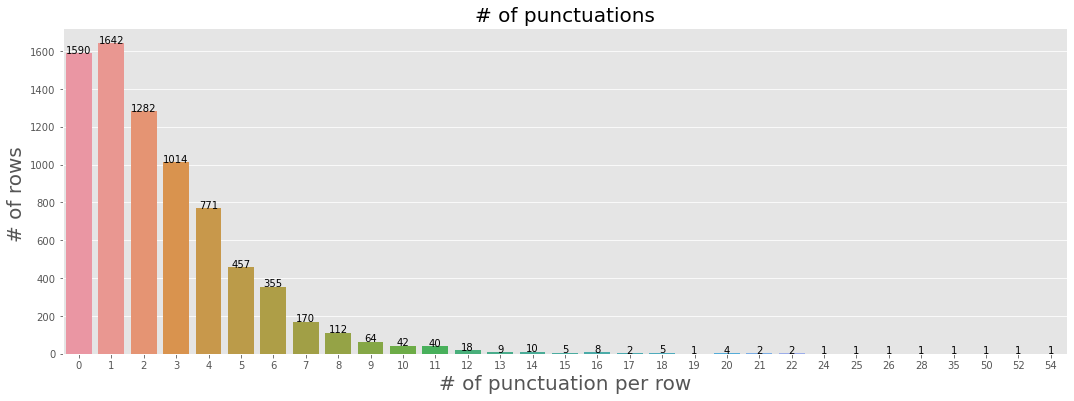

In [64]:
plt.figure(figsize=(18,6))
plt.title("# of punctuations",fontsize=20)
sns.barplot(punct_count.index,punct_count.values)
plt.xlabel("# of punctuation per row",fontsize=20)
for row,col in zip([i for i in range(len(punct_count))],punct_count.values):
    plt.text(row,col,col,ha = 'center')
plt.ylabel("# of rows ",fontsize=20)

## Some other symbols

In [65]:
def remove_symbols(text):
    return re.sub('[~:*ÛÓ_å¨È$#&%^ª|+-]+?','',text)

In [66]:
s = 'abcd Û sdÓ_daåfs%^ª|+-fgdas' 

print("withoutsymbols : ",remove_symbols(s))

withoutsymbols :  abcd  sddafsfgdas


# Cleaning Text
- by removing Punctuations and special symbols

In [67]:
df_train['text'] = df_train.text.apply(remove_punctuations)

In [68]:
df_train['text'] = df_train.text.apply(remove_symbols)

In [69]:
get_text(df_train)

# Misspelt word(typo)

In [70]:
!pip install pyspellchecker
!pip install textblob

     |████████████████████████████████| 1.9 MB 603 kB/s 
You should consider upgrading via the '/opt/conda/bin/python3.7 -m pip install --upgrade pip' command.
You should consider upgrading via the '/opt/conda/bin/python3.7 -m pip install --upgrade pip' command.


In [71]:
from spellchecker import SpellChecker
from textblob import TextBlob

def find_typo(sent):
    spell = SpellChecker()
    words = sent.split()
    words = spell.unknown(words)
    return words

def count_typo(sent):
    return len(find_typo(sent))

def correct_typo(sent):
    spell = SpellChecker()
    words = sent.split()
    words = spell.unknown(words)
    find = []
    for word in words:
        find.append(spell.correction(word))
    return find    

def correct_byspellchecker(sent):
    ic, c = list(find_typo(sent)), list(correct_typo(sent))
    for i in range(len(ic)):
        sent = sent.replace(ic[i],c[i])
    return sent

def correct_bytextblob(sent):
    return str(TextBlob(sent).correct())

In [72]:
# Example

s = "Good to workk with naturl laguage procesing Can yoou tell me more about your work how well you doneee it"
print("orginal_text            :  ",s)
print("typos                   :  ",find_typo(s))
print("count typos             :  ",count_typo(s))
print("correct typos           :  ",correct_typo(s))
print("correct_by spellchecker :  ",correct_byspellchecker(s))
print("correct_bytextblob      :  ",correct_bytextblob(s))

orginal_text            :   Good to workk with naturl laguage procesing Can yoou tell me more about your work how well you doneee it
typos                   :   {'laguage', 'yoou', 'workk', 'naturl', 'doneee', 'procesing'}
count typos             :   6
correct typos           :   ['language', 'you', 'work', 'nature', 'donee', 'processing']
correct_by spellchecker :   Good to work with nature language processing Can you tell me more about your work how well you donee it
correct_bytextblob      :   Good to work with nature language processing An you tell me more about your work how well you done it


In [73]:
# %%time
# df_train['count_typo'] = df_train.text.apply(count_typo)
# df_train['typo'] = df_train.text.apply(find_typo)
# try:
#     df_train['correct_typo'] = df_train.text.apply(correct_typo)
# except:
#     pass

# df_train.to_csv('getdata.csv',index=False)

### Above comment code tooks so much time
- CPU times: user 3h 44min 24s
- sys: 8min 14s, total: 3h 52min 39s
- Wall time: 3h 52min 43s*

We use the data that run first time in version 11 of the same notebook. So That we have not to wait.

In [74]:
df_train = pd.read_csv("../input/real-nlp-disaster-tweets-processed-dataframe/getdata.csv")

Text(0, 0.5, 'Rows Count')

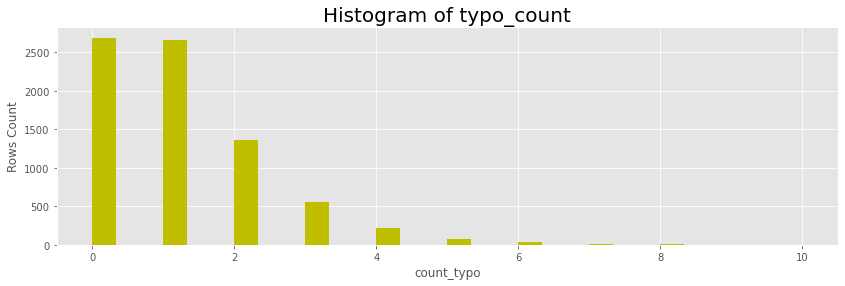

In [75]:
plt.figure(figsize = (14, 4))
plt.title("Histogram of typo_count",fontsize=20)
sns.distplot(df_train.count_typo,kde=False,bins=30,hist=True,
                           hist_kws={ "linewidth": 2,
                                     "alpha": 1, "color": "y"})
plt.ylabel("Rows Count")

# Splitting dataset

In [76]:
from sklearn.model_selection import train_test_split

train,valid = train_test_split(df_train,test_size = 0.2,random_state=0,stratify = df_train.target.values)

print("train shape : ", train.shape)
print("valid shape : ", valid.shape)

train shape :  (6090, 17)
valid shape :  (1523, 17)


# BagOfWords Implementation

In [77]:
from nltk.corpus import stopwords
stop = list(stopwords.words('english'))

In [78]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(decode_error = 'replace',stop_words = stop)

X_train = vectorizer.fit_transform(train.text.values)
X_valid = vectorizer.transform(valid.text.values)

y_train = train.target.values
y_valid = valid.target.values

print("X_train.shape : ", X_train.shape)
print("X_train.shape : ", X_valid.shape)
print("y_train.shape : ", y_train.shape)
print("y_valid.shape : ", y_valid.shape)

X_train.shape :  (6090, 14275)
X_train.shape :  (1523, 14275)
y_train.shape :  (6090,)
y_valid.shape :  (1523,)


# Baseline Model (Naive Bayes)

In [79]:
from sklearn.naive_bayes import MultinomialNB

baseline_clf = MultinomialNB()
baseline_clf.fit(X_train,y_train)

MultinomialNB()

In [80]:
baseline_prediction = baseline_clf.predict(X_valid)
baseline_accuracy = accuracy_score(y_valid,baseline_prediction)
print("training accuracy Score    : ",baseline_clf.score(X_train,y_train))
print("Validdation accuracy Score : ",baseline_accuracy )

training accuracy Score    :  0.9177339901477832
Validdation accuracy Score :  0.8017071569271176


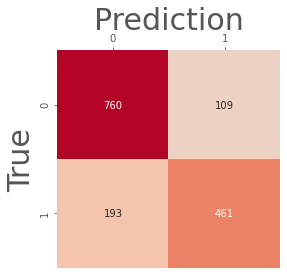

In [81]:
plt.figure(figsize = (4,4))
class_label = [0,1]
fig = sns.heatmap(confusion_matrix(y_valid,baseline_prediction),cmap= "coolwarm",annot=True,vmin=0,cbar = False,
            center = True,xticklabels=class_label,yticklabels=class_label, fmt='d' )
fig.set_xlabel("Prediction",fontsize=30)
fig.xaxis.set_label_position('top')
fig.set_ylabel("True",fontsize=30)
fig.xaxis.tick_top()

In [82]:
md("### Our Baseline model validation accuracy is {}% (overfitting)".format(round(baseline_accuracy,2)))

### Our Baseline model validation accuracy is 0.8% (overfitting)

# Linear Model (SGD Classifier)

In [83]:
from sklearn.linear_model import SGDClassifier
linear_model_sgd = SGDClassifier(loss = 'hinge', penalty = 'l2', random_state=0)
linear_model_sgd.fit(X_train,y_train)

SGDClassifier(random_state=0)

In [84]:
linear_model_sgd_prediction = linear_model_sgd.predict(X_valid)
linear_model_sgd_accuracy = accuracy_score(y_valid,linear_model_sgd_prediction)
print("training accuracy Score    : ",linear_model_sgd.score(X_train,y_train))
print("Validdation accuracy Score : ",linear_model_sgd_accuracy )

training accuracy Score    :  0.9847290640394089
Validdation accuracy Score :  0.7747866053841103


In [85]:
md("### Our sgd model validation accuracy is {}% (heavily overfitting)".format(round(linear_model_sgd_accuracy,2)))

### Our sgd model validation accuracy is 0.77% (heavily overfitting)

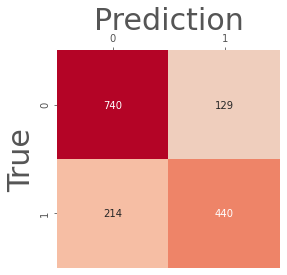

In [86]:
plt.figure(figsize = (4,4))
class_label = [0,1]
fig = sns.heatmap(confusion_matrix(y_valid,linear_model_sgd_prediction),cmap= "coolwarm",annot=True,vmin=0,cbar = False,
            center = True,xticklabels=class_label,yticklabels=class_label, fmt='d' )
fig.set_xlabel("Prediction",fontsize=30)
fig.xaxis.set_label_position('top')
fig.set_ylabel("True",fontsize=30)
fig.xaxis.tick_top()

### Parameter Tuning of SGDClassifier

In [87]:
from sklearn.model_selection import GridSearchCV

params = {
     'max_iter': (100,500,1000),
     'alpha': (1e-1,1e-2,1e-4),
      'learning_rate': ('optimal','invscaling'),
    'eta0' : (0.1,0.05),
                     
}

gridcv = GridSearchCV(linear_model_sgd,param_grid = params, cv = 5)

gridcv.fit(X_train,y_train)
print("best parameter : ")
for param_name in sorted(params.keys()):
    print("      %s: %r" % (param_name, gridcv.best_params_[param_name]))

best parameter : 
      alpha: 0.0001
      eta0: 0.1
      learning_rate: 'invscaling'
      max_iter: 100


In [88]:
linear_model_sgd_prediction = gridcv.predict(X_valid)
linear_model_sgd_accuracy = accuracy_score(y_valid,linear_model_sgd_prediction)
print("Tune training accuracy Score    : ",gridcv.score(X_train,y_train))
print("Tune Validation accuracy Score : ",linear_model_sgd_accuracy )

Tune training accuracy Score    :  0.8446633825944171
Tune Validation accuracy Score :  0.7977675640183848


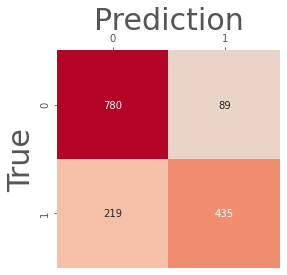

In [89]:
plt.figure(figsize = (4,4))
class_label = [0,1]
fig = sns.heatmap(confusion_matrix(y_valid,linear_model_sgd_prediction),cmap= "coolwarm",annot=True,vmin=0,cbar = False,
            center = True,xticklabels=class_label,yticklabels=class_label, fmt='d' )
fig.set_xlabel("Prediction",fontsize=30)
fig.xaxis.set_label_position('top')
fig.set_ylabel("True",fontsize=30)
fig.xaxis.tick_top()

### Classification Report of tune sgd model

In [90]:
print(classification_report(y_valid,linear_model_sgd_prediction))

              precision    recall  f1-score   support

           0       0.78      0.90      0.84       869
           1       0.83      0.67      0.74       654

    accuracy                           0.80      1523
   macro avg       0.81      0.78      0.79      1523
weighted avg       0.80      0.80      0.79      1523



In [91]:
md("### Our tune sgd model validation accuracy is {}% (less overfitting)".format(round(linear_model_sgd_accuracy,2)))

### Our tune sgd model validation accuracy is 0.8% (less overfitting)

# Preprocessing Test Set

In [92]:
def preprocessing(df):
    df['Char_length']       = df['text'].apply(len)
    df['word_count']        = df.text.apply(word_count)
    df['url_count']         = df.text.apply(url_counts)
    df['urls']              = df.text.apply(urls)
    df['text']              = df.text.apply(remove_urls)
    df['emoji_count']       = df.text.apply(emoji_count)
    df['emojis']            = df.text.apply(emoji_extraction)
    df['text']              = df['text'].apply(emoji_to_text)
    df['hash_count']        = df.text.apply(count_hashtags)
    df['hashtags']          = df.text.apply(find_hashtags)
    df['text']              = df.text.apply(remove_hashtags)
    df['text']              = df.text.apply(replace_username)
    df['count_number']      = df.text.apply(count_number)
    df['number']            = df.text.apply(find_number)
    df['text']              = df.text.apply(remove_number)
    df['count_punctuation'] = df.text.apply(count_punctuations)
    df['punctuation']       = df.text.apply(find_punctuations)
    df['text']              = df.text.apply(remove_punctuations)
    df['text']              = df.text.apply(remove_symbols)
                                            
    return df

In [93]:
%%time
processed_test_df = preprocessing(df_test)

CPU times: user 5.04 s, sys: 1.96 ms, total: 5.04 s
Wall time: 5.04 s


# Linear Model Prediction on test set

In [94]:
def bagofword(df):
    X = vectorizer.transform(df.text.values)
    return X    

def predict_test(model,x):
    return model.predict(x)

In [95]:
X_test = bagofword(processed_test_df)
target = predict_test(gridcv,X_test)
submission['target'] = target
submission.to_csv('submission.csv',index=False)
submission.head()

,id,target
0,0,1
1,2,0
2,3,1
3,9,0
4,11,1


### Our First Submission Touch the benchmark score 0.78179

# In Progress ...

# Acknowledge to Other Sources
1. [Technology org](https://www.technology.org/2020/02/28/real-or-not-nlp-with-disaster-tweets/#:~:text=Twitter%20has%20become%20an%20important,re%20observing%20in%20real%2Dtime.)
2. [Basic EDA,Cleaning and GloVe](https://www.kaggle.com/shahules/basic-eda-cleaning-and-glove)
3. [emojicopy](https://www.emojicopy.com/)
4. [Cheatsheet - Text Helper Functions](https://www.kaggle.com/raenish/cheatsheet-text-helper-functions)
4. [englishclub](https://www.englishclub.com/writing/symbols.php#:~:text=%40,addresses%20and%20social%20media%20handles.)

# Some Other Refrences
- [Spellchecker](https://pypi.org/project/pyspellchecker/)
- [textblob](https://www.pythonprogramming.in/how-to-correct-spelling-using-textblob-in-python.html)